# Bruk av Euler-Cromer-metoden og bli kjent med SciPy-biblioteket

### TFY4163 Fluidmekanikk og bølgefysikk – Programmeringsøving 2

**Forkunnskaper:** Introduksjon til SciPy-notebooken og Euler-metoden. 

**Læringsmål:** Løse andreordens ODE ved Euler-Cromer-metoden. Bli kjent med SciPy-biblioteket, og benytte en funksjon fra integrate pakken for å løse ODE. 

------------------------

I programmeringsøving 1 ble Euler-metoden brukt til å finne en løsning av bevegelsesligningen for en enkel harmonisk pendel. Vi observerte da at vinkelutslaget, og derfor energien, økte raskt med tiden. Vi må derfor forbedre vår numeriske metode for å få en fysisk løsning.

Til dette skal vi benytte Euler-Cromer metoden (ofte også kalt semi-implisitt Euler-metode). Metoden er basert på en enkel modifikasjon av Euler metoden. Vi bruker de *gamle* verdiene, $\theta_i$ for å beregne vinkelhastigheten $\omega_{i+1}$, men den *oppdaterte* verdien, $\omega_{i+1}$, for å beregne vinkelen, $\theta_{i+1}$.

Bevegelsesligningen (som ble utledet i programmeringsøving 1) er


$$\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \sin \theta,$$ 

hvor $\theta$ er vinkelutslaget til snora med hensyn til vertikalen, $g$ er tyngdeakselerasjonen og $l$ er lengden av snora.

## Oppgave 1 – Løsning av bevegelsesligningen ved Euler-Cromer metoden 

Parametrene og initialbetingelsene til pendelen

- Lengden av snora, $l = 1.0$ m
- Masse, $m = 5$ kg
- Tyngdeakselerasjonen, $g = 9.8 \: \text{m}/\text{s}^2$ 
- Startvinkel til snora med hensyn til vertikalen, $\theta_0 = 0.2$ rad
- Vinkelhastighetens startverdi, $\omega_0 = 0.0$ rad/s

**a)** Lag en funksjon hvor du beregner vinkelutslaget, $\theta$, og vinkelhastigheten, $\omega$, ved å bruke Euler-Cromer metoden. Anta også her at $\sin \theta \approx \theta$ (lite vinkelutslag).

In [1]:
# Husk å definere nødvendige biblioteker
import numpy as np
import matplotlib.pyplot as plt

# Define parameters and initial conditions
m = 5            # [kg], mass 
l = 1.0          # [m], length of string
g = 9.8          # [m/s^2], gravitational acceleration
theta_0 = 0.2    # [rad], intial angular displacement, with respect to the vertical 
w_0 = 0.0        # [rad/s], initial angular velocity
T = 10     # [s], evaluate up to T

n = 1000 # definerer steglengde

# For å plotte i notebooken
%matplotlib inline

def euler_cromer_approx(theta_0, w_0, dt, T):
    n = int(T/dt) #regner ut antall tidssteg
    theta_arr = np.zeros(n+1) #lager array
    omega_arr = np.zeros(n+1)

    tid = np.linspace(0,T,n+1) #lager array
    theta_arr[0] = theta_0 #definerer theta ved t=0
    
    for i in range(0, n): #for løkke som kjører n ganger for euler-cromer
        omega_arr[i+1] = omega_arr[i] + -g/l*theta_arr[i]*dt #regner ut omega med euler
        theta_arr[i+1] = theta_arr[i] + omega_arr[i+1]*dt #regner ut theta med euler



    """
    theta: array with values of angular displacement
    w: array with values of angular velocity
    t: array with time-values
    """
    
    return theta_arr, omega_arr, tid #returer theta-verdier, omega-verdier og tid som arrays



**b)** Vi skal nå undersøke hvor stabil Euler-Cromer metoden er for vårt system.

1. Plot vinkelutslaget, $\theta$, som funksjon av tid, $t$, opp til $t = 10$ s. Bruk tidssteg $\Delta t = 0.007$ s. Observer at amplituden til vinkelutslaget *ikke* endrer seg med tid slik den gjorde med Euler-metoden i programmeringsøvingøving 1 (oppgave 2c). Euler-Cromer metoden er derfor en forbedring over Euler metoden da vi har konstant total energi.

2. Benytt funksjonen `energy_calculation` fra programmeringsøving 1 (oppgave 2b), og bytt ut  `euler_method` med `euler_cromer_approx`. Plot den totale energien til pendelen som funksjon av tid, for tidssteg $\Delta t = 0.001$ s, $\Delta t = 0.004$ s og $\Delta t = 0.007$ s. Husk å inkludere `label` for plottene, og `legend` for figuren. Du vil nå observere at den totale energien varierer periodisk, men er konservert for en *periode*,
$2 \pi \sqrt{l/g}$. Videre vil du observere at hvor mye energien varierer over en periode minker med tidssteget. 


5. Beregn energidifferansen mellom slutten og starten av en periode for $\Delta t = 0.001$ s. *Hint:* Plot for tid opp til $t = 2 \pi \sqrt{l/g}$, slik at det siste elementet i arrayen er ved fullført periode. Du kan aksessere siste element i en array, `a`, med `a[-1]`.

Endringen i energi over en periode ved dt=0.001 ble 8.557526364194601e-07


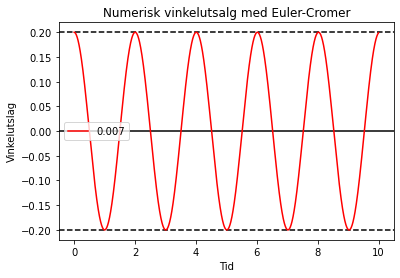

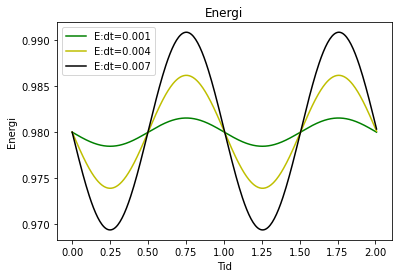

In [2]:

T = 10
theta_1, omega_1, tid_1 = euler_cromer_approx(theta_0, w_0, 0.007, T)

plt.axhline(y = 0, color = 'k', linestyle = '-') #plotter linje i y=0

plt.axhline(y = 0.2, color = 'k', linestyle = '--') #plotter asymptote i maksutslaget
plt.axhline(y = -0.2, color = 'k', linestyle = '--') #plotter asymptote i minimumsutslaget

plt.plot(tid_1,theta_1, 'r', label='0.007') #plotter verdiene

plt.title('Numerisk vinkelutsalg med Euler-Cromer') #tittel

plt.xlabel('Tid') #x-akse
plt.ylabel('Vinkelutslag') #y-akse
plt.legend()
plt.figure()

def energy_calculation(theta_0, w_0, dt, T):
    """
    Calculates total energy for each time which theta and omega is calculated for.
    
    theta0: initial angular displacement
    w0: initial angular velocity 
    dt: timestep
    T: max T
    """
    # SKRIV KODE HER
    theta_1, omega_1, tid_1 = euler_cromer_approx(theta_0, w_0, dt, T) #bruker funksjonen fra 2c til å hente ut
    n = int(T/dt) #verdier for theta, omega og tid. Regner også ut n på nytt
    
    E_total  = np.zeros(n+1) #lager et tomt array til energien
    t = np.linspace(0,T,n+1) #lager arrat for tid

    
    E_total[0] = 1/2*m*g*l*theta_0**2 #regner ut energien ved start
    for i in range(0,n): #for-løkke som brukes til å simulere v. euler.
        E_total[i+1] = 0.5*m*l**2*omega_1[i+1]**2 + 1/2*m*g*l*theta_1[i+1]**2 #tilegner energiverdien ved tid t+dt til energiarrayet 
    0
    """
    E_total: array with the total energy found from values of theta and w (omega)
    t: array with timevalues 
    """
    
    
    return E_total, t, E_total[-1]-E_total[0] #returnerer array med total energi og array med tiden som tilsvarer energiene.

T = 2*np.pi*np.sqrt(l/g)
E_total_1, tid_1, delta_E_1 = energy_calculation(theta_0, w_0, 0.001, T) #lagrer verdiene for tid og energi ved ulike dt
E_total_2, tid_2, delta_E_2 = energy_calculation(theta_0, w_0, 0.004, T)
E_total_3, tid_3, delta_E_3 = energy_calculation(theta_0, w_0, 0.007, T)

plt.plot(tid_1,E_total_1 , 'g', label='E:dt=0.001') #plotter energi mhp tid.
plt.plot(tid_2,E_total_2, 'y', label='E:dt=0.004')
plt.plot(tid_3,E_total_3, 'k', label='E:dt=0.007')
plt.title('Energi')

plt.xlabel('Tid') #gir navn til x-akse
plt.ylabel('Energi') #gir navn til y-akse
plt.legend()

print('Endringen i energi over en periode ved dt=0.001 ble', delta_E_1)





**c)** Vi går nå bort fra tilnærmelsen $\sin \theta = \theta$, slik at bevegelsesligningen for pendelen er gitt ved

\begin{equation}
 	\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \sin \theta.
	\label{bevegelse}
\end{equation}

Denne differensialligningen, som er ikke-lineær, kan ikke løses analytisk, og vi *må* derfor benytte numeriske metoder. Det er viktig å merke seg at svært mangle ligninger man kommer fram til i fysikken ikke har analytiske løsninger, og det er derfor nyttig å kunne numeriske metoder for å tilnærme løsningene. 

1. Skriv en funksjon som beregner vinkelutslaget, $\theta$, og vinkelhastigheten, $\omega$, som funksjon av tid ved bruk av Euler-Cromer metoden. *Hint:* Kun en liten endring av koden er nødvendig.


2. Plot vinkelutslaget funnet med liten vinkel tilnærmelsen sammen med vinkelutslaget som beregner fra funksjonen over, for initialvinkel $\theta_0 = 15^\circ$ og $\theta_0 = 40^\circ$. Benytt tidssteg $\Delta t = 0.001$ s. Prøv deg gjerne fram med forskjellige vinkler, og observer for hvilke startvinkler det ser ut som at liten vinkel tilnærmelsen er rimelig å benytte. *Tips:* Bruk funksjonen `np.radians` for å konvertere fra grader til radianer.
 
 

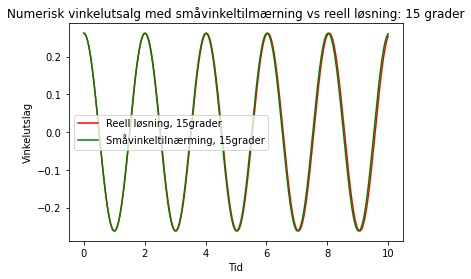

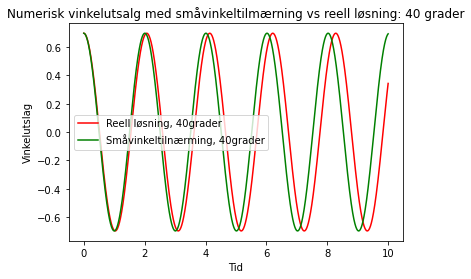

In [3]:
# Husk å definere nødvendige biblioteker
import numpy as np
import matplotlib.pyplot as plt

# Define parameters and initial conditions
m = 5            # [kg], mass 
l = 1.0          # [m], length of string
g = 9.8          # [m/s^2], gravitational acceleration
w_0 = 0.0        # [rad/s], initial angular velocity
T = 10     # [s], evaluate up to T

n = 1000 # definerer steglengde

# For å plotte i notebooken
%matplotlib inline

def euler_cromer(theta_0, w_0, dt, T):
    n = int(T/dt) #regner ut antall tidssteg
    theta_arr = np.zeros(n+1) #lager array
    omega_arr = np.zeros(n+1)

    tid = np.linspace(0,T,n+1) #lager array
    theta_arr[0] = theta_0 #definerer theta ved t=0
    
    for i in range(0, n): #for løkke som kjører n ganger for euler-cromer
        omega_arr[i+1] = omega_arr[i] + -g/l*np.sin(theta_arr[i])*dt #regner ut omega med euler
        theta_arr[i+1] = theta_arr[i] + omega_arr[i+1]*dt #regner ut theta med euler



    """
    theta: array with values of angular displacement
    w: array with values of angular velocity
    t: array with time-values
    """
    
    return theta_arr, omega_arr, tid #returer theta-verdier, omega-verdier og tid som arrays

theta_0 = np.radians(15)    
theta_1, omega_1, tid_1 = euler_cromer(theta_0, w_0, 0.001, T) 
theta_2, omega_2, tid_2 = euler_cromer_approx(theta_0, w_0, 0.001, T) 


plt.plot(tid_1,theta_1, 'r', label='Reell løsning, 15grader')
plt.plot(tid_2,theta_2, 'g', label='Småvinkeltilnærming, 15grader')

plt.title('Numerisk vinkelutsalg med småvinkeltilmærning vs reell løsning: 15 grader') #tittel

plt.xlabel('Tid') #x-akse
plt.ylabel('Vinkelutslag') #y-akse
plt.legend()
plt.figure()

theta_0 = np.radians(40)    
theta_1, omega_1, tid_1 = euler_cromer(theta_0, w_0, 0.001, T) 
theta_2, omega_2, tid_2 = euler_cromer_approx(theta_0, w_0, 0.001, T) 



plt.plot(tid_1,theta_1, 'r', label='Reell løsning, 40grader')
plt.plot(tid_2,theta_2, 'g', label='Småvinkeltilnærming, 40grader')

plt.title('Numerisk vinkelutsalg med småvinkeltilmærning vs reell løsning: 40 grader') #tittel

plt.xlabel('Tid') #x-akse
plt.ylabel('Vinkelutslag') #y-akse
plt.legend()
plt.show()

##  Oppgave 2 – Bruk av SciPy biblioteket

Vi skal nå bruke funksjonen `scipy.integrate.solve_ivp` fra SciPy-biblioteket for å finne løsning til bevegelsesligningen for pendelen (som er en andreordens ordinær differensialligning). Når man skal bruke en ny funksjon for første gang så må man lese gjennom funksjons-dokumentasjonen, sånn at man skjønner hvordan funksjonen brukes. Les derfor gjennom notebooken "Introduksjon til SciPy" som ligger på BlackBoard under "Numeriske øvinger". **Det er viktig at du har lest nøye gjennom denne, og forstår eksempelet gitt der.**

`scipy.integrate.solve_ivp` bruker Runge-Kutta 5(4)-metoden (ofte forkortet RK45) som standard, noe vi også skal bruke i denne oppgaven. Denne metoden er en såkalt *adaptiv metode* med varierende tidssteg. Kort fortalt bruker metoden to ulike ODE-løsere (4. og 5. ordens Runge-Kutta [se programmeringsøving 3]) til å beregne usikkerheten til hvert steg. Steglengden justeres slik at ønsket usikkerhet blir oppnådd. Dermed bruker man korte steglengder kun når det er nødvendig. Dere lærer mer om dette i faget TMA4320 Introduksjon til vitenskapelige beregninger. De som er interesserte kan ta en titt på notebooken [Adaptive Runge-Kutta Method](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/adaptive_runge_kutta_methods.ipynb) for å lære mer om prinsippet.

I eksemplene fra dokumentasjonen er det vist hvordan man finner løsning for en førsteordens ordinær differensialligning (ODE). Bevegelsesligningen for den enkle harmoniske pendelbevegelsen er en *andreordens ODE*. Vi må derfor løse ett ligningssystem av *to* ODE-er. 

**a)** Lag en funksjon som tar inn en float `t`, og et array `vals`, og returnerer et array av de to verdiene til høyresiden av de to ODE-ene for den harmonsike pendelen (uten å anta lite vinkelutslag). Det er gitt funksjonsdeklarasjon, input parametre og hva som skal returneres i funksjonen under. *Hint:* Skriv først bevegelsesligningen for pendelen som to førsteordens ODE-er (slik som ble gjort i programmeringsøving 1). 


In [4]:
from scipy import integrate     # Importerer integrate pakken
import numpy as np              # Importerer numpy, som np
import matplotlib.pyplot as plt # For å plotte med matplotlib
import matplotlib as mpl
%matplotlib inline 
mpl.rcParams['figure.dpi'] = 200 # Setter dpi til figuren til 200 (bedre kvalitet)

t_1 = 10
theta_0 = 0.2
w_0 = 0
dt = 0.01
g = 9.81
l = 1.0

def equation(t, vals): 
    
    theta = vals[0]
    omega = vals[1]
    
    dw = -g/l*np.sin(theta)
    dtheta = omega
    
    return [dtheta,dw]

"""
Note:
scipy.integrate.solve_ivp requires that fun returns
an object which is of type array_like. 
An ordinary list is of this type (as well as e.g. integers, floats and numpy arrays)
so we can return a list, and do not have to first convert into an np.array. 
"""

'\nNote:\nscipy.integrate.solve_ivp requires that fun returns\nan object which is of type array_like. \nAn ordinary list is of this type (as well as e.g. integers, floats and numpy arrays)\nso we can return a list, and do not have to first convert into an np.array. \n'

**b)** Lag en funksjon som benytter `scipy.integrate.solve_ivp` for å beregne vinkelutslaget, $\theta$ og vinkelhastigheten, $\omega$. Funksjonen skal også returnere en array med tidsverdier. Plot vinkelutslaget som funksjon av tid, opp til $t = 10$ s. Sett $\theta_0 = 0.2$ rad, og $\omega_0 = 0.0$ rad/s. Bruk tidssteg $\Delta t = 0.01$.

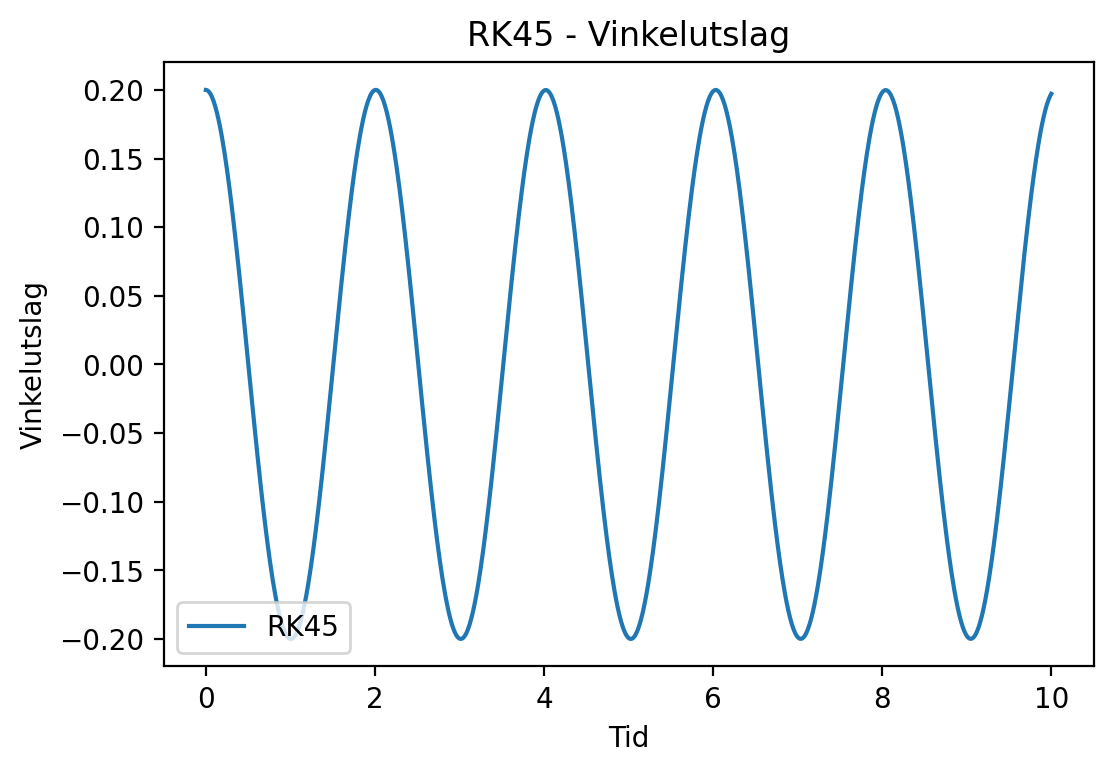

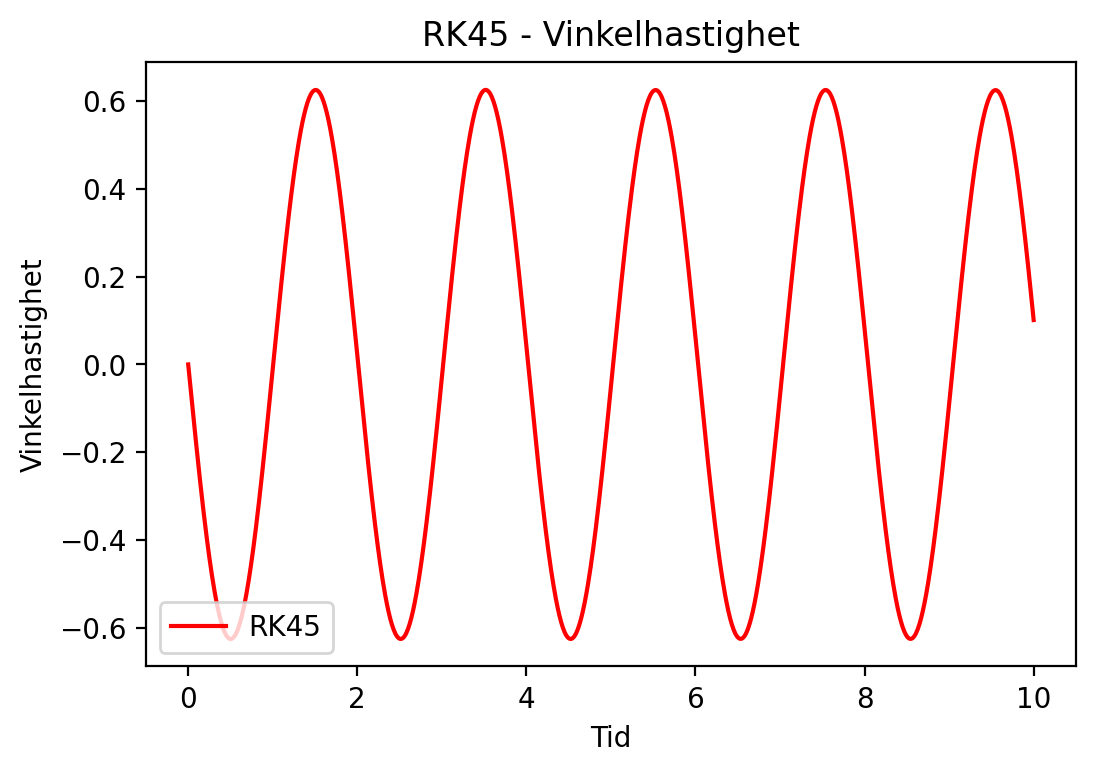

In [5]:

def RK45_method(RHS, theta_0, w_0, t_1, dt):
    # Regner ut y-verdier
    # RHS: Høyre side av differensialligningen
    # t_1: sluttid
    # dt: tidssteg
                                   # må derfor ha som array selv om det kun er en verdi her.
    t_span = [0, t_1+dt]           # Liste med start og sluttverdi
    t = np.arange(0, t_1 + dt, dt) # Array med verdier fra 0 til t_1, med dt som steglengde mellom verdier
    solution = integrate.solve_ivp(RHS, t_span, [theta_0, w_0], method = 'RK45', t_eval = t) 
    # Setter at method = 'RK45', men dette er standard så må ikke ha med
    x = solution.y[0, :] # Array med y-verdier
    w = solution.y[1,:]
    return x, w, t

# PLOT VINKELUTSLAGET
theta, w, t = RK45_method(equation, theta_0, w_0, t_1, dt)

plt.plot(t,theta, label='RK45')

plt.title('RK45 - Vinkelutslag')
plt.xlabel('Tid')
plt.ylabel('Vinkelutslag')
plt.legend(loc='lower left',fancybox = True)
plt.show()

plt.figure()
plt.plot(t,w, label='RK45', color='r')
plt.title('RK45 - Vinkelhastighet')
plt.xlabel('Tid')
plt.ylabel('Vinkelhastighet')
plt.legend(loc='lower left',fancybox = True)
plt.show()
